In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Coaches = pd.read_json('coaches/coaches.json')
Players = pd.read_json('players/players.json')
Events = pd.read_json('events/events_England.json')
Teams = pd.read_json('teams/teams.json')
Matches = pd.read_json('matches/matches_England.json')

In [2]:
# Add column 'Nation' on Teams
Nation = pd.DataFrame([x['name'] for x in Teams['area']],columns=['Nation'])
Teams = pd.merge(Teams, Nation, left_index=True, right_index=True)
Teams_England = Teams[((Teams['Nation'] == 'England') | (Teams['Nation'] == 'Wales')) & (Teams['type'] == 'club')]

In [3]:
# Add column 'Age' on Coaches
current_date = datetime.now().date()
Age = []
for x in Coaches['birthDate']:
    # because some coach doesn't have the birthDate
    try:
        Age.append(int((current_date - date.fromisoformat(x)).days // 365))
    except:
        Age.append(0)
Age = pd.DataFrame(Age, columns=['Age'], dtype=int)
Coaches = pd.merge(Coaches, Age, left_index=True, right_index=True)

In [4]:
# check teams coaches in Matches and create pandas dataframe Coaches_Teams_England
teams_coaches = []
# for every matches we take the coach and put it in teams_coaches
for x in (Matches['teamsData']):
    for y in x:
        teams_coaches.append({'Team':x[y]['teamId'], 'Coach':x[y]['coachId']})
teams_coaches = pd.DataFrame(teams_coaches)

# merge coaches with teams_coaches
Coaches_Teams_England = pd.merge(teams_coaches, Coaches[['currentTeamId', 'birthDate','Age','wyId']], left_on='Coach', right_on='wyId')
#merge Teams with Coaches_teams_England
Coaches_Teams_England = pd.merge(Coaches_Teams_England, Teams_England[['wyId', 'officialName']], left_on='Team', right_on='wyId' )

'''
Clean DataFrame:
1) remove duplicate row
2) sort by birthDate
3) remove duplicate row with the same officialName and keep last == the youngest coach
''' 
Coaches_Teams_England = Coaches_Teams_England.drop_duplicates()
Coaches_Teams_England = Coaches_Teams_England.sort_values(by=['birthDate'])
Coaches_Teams_England = Coaches_Teams_England.drop_duplicates(subset='officialName', keep="last")

In [5]:
# Print the 10 teams with the youngest coaches
Teams_young_Coaches = Coaches_Teams_England.sort_values(by=['birthDate']).iloc[-10:]
print('\n'.join(list(Teams_young_Coaches['officialName'])))

Burnley FC
Southampton FC
Huddersfield Town FC
Swansea City AFC
Tottenham Hotspur FC
Newcastle United FC
Everton FC
Leicester City FC
Watford FC
AFC Bournemouth


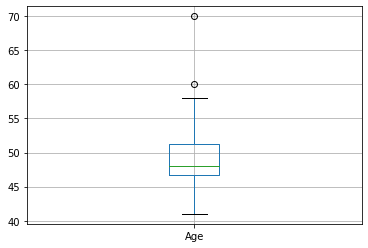

In [6]:
#Print Age boxplot
Coaches_Teams_England.boxplot(column="Age")
plt.show()